In [2]:
import os
import pandas as pd

In [3]:
data_dir="/home/saadyaq/SE/Python/emotion_detector/data/raw/SPEECH_RECOGNITION/audio_speech_actors_01-24"

In [4]:
emotion_map={
    "01":"neutral",
    "02":"calm",
    "03":"happy",
    "04":"sad",
    "05":"angry",
    "06":"fearful",
    "07":"disgust",
    "08":"surprised"
}

In [5]:
#Collecte des infos
filepaths=[]
emotions=[]
actors=[]
for root,dirs,files in os.walk(data_dir):
    for file in files:
        if file.endswith(".wav"):
            parts=file.split("-")
            emotion_code=parts[2]
            actor_id=root.split("_")[-1]
            filepaths.append(os.path.join(root,file))
            emotions.append(emotion_map[emotion_code])
            actors.append(actor_id)


In [7]:
df=pd.DataFrame({
    "path":filepaths,
    "actor":actors,
    "emotion":emotions
})
df.to_csv("../data/metadata.csv",index=False)

In [8]:
df.head()

,path,actor,emotion
0,/home/saadyaq/SE/Python/emotion_detector/data/...,18,sad
1,/home/saadyaq/SE/Python/emotion_detector/data/...,18,fearful
2,/home/saadyaq/SE/Python/emotion_detector/data/...,18,neutral
3,/home/saadyaq/SE/Python/emotion_detector/data/...,18,angry
4,/home/saadyaq/SE/Python/emotion_detector/data/...,18,happy


In [11]:
df['emotion'].value_counts()

emotion
sad          192
fearful      192
angry        192
happy        192
surprised    192
disgust      192
calm         192
neutral       96
Name: count, dtype: int64

<Axes: xlabel='emotion'>

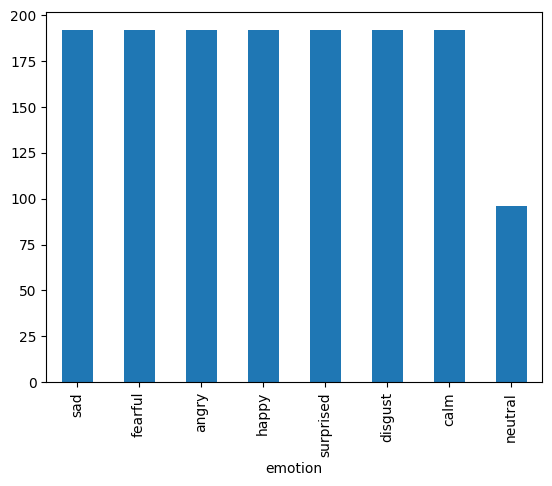

In [9]:
df["emotion"].value_counts().plot(kind="bar")